In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model , metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score,r2_score,max_error,mean_absolute_error,median_absolute_error,mean_squared_error
from math import sqrt
import joblib
%matplotlib inline

In [44]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [45]:
init_notebook_mode(connected=True)
cf.go_offline()

In [46]:
df=pd.read_csv('BAUXITEINBULK.csv')

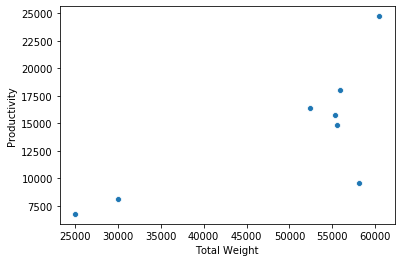

In [47]:
sns.scatterplot(x='Total Weight',y='Productivity',data=df)

In [48]:
df.describe()

,Unnamed: 0,VCN,TAT (ATB -ATUB)\nHOUR,TAT\n(ATA - ATD)\nHOUR,Total Weight,QTY IN LAKH MT,Qty in MMT,TEUs ('000),Port Delay (Hrs),Vessel Delay (Hrs),Productivity,DEAD WT
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.0,8.000000,8.000000,8.000000,4.00000
mean,1243.000000,192835.375000,59.028750,68.122500,49107.884000,0.491250,0.049125,0.0,8.153750,0.058750,14293.183750,35495.77500
std,279.353335,3152.908496,37.726611,46.398792,13587.229114,0.136532,0.013653,0.0,14.311233,0.158244,5938.713229,24456.75335
min,790.000000,190960.000000,0.000000,0.000000,25000.000000,0.250000,0.025000,0.0,0.000000,0.000000,6760.560000,13138.10000
25%,1219.250000,191306.500000,44.002500,44.835000,46853.750000,0.465000,0.046500,0.0,0.000000,0.000000,9238.990000,14929.77500
50%,1372.000000,191482.000000,75.575000,80.825000,55450.000000,0.555000,0.055500,0.0,3.415000,0.000000,15339.985000,36047.50000
75%,1416.750000,192822.000000,85.247500,97.315000,56418.554000,0.565000,0.056500,0.0,8.025000,0.005000,16816.840000,56613.50000
max,1420.000000,200415.000000,89.580000,127.950000,60500.000000,0.610000,0.061000,0.0,42.300000,0.450000,24750.000000,56750.00000


In [49]:
X=df[['Total Weight']]
y=df['Productivity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [50]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
print(lm.intercept_)

-5537.448139603937


In [52]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Total Weight,0.424542


In [53]:
predictions = lm.predict(X_test)

In [54]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))#Main
print('r2_score:',r2_score(y_test,predictions))

MAE: 3836.8572792335326
MSE: 31177932.028881785
RMSE: 5583.720267785788
r2_score: -0.896704918010077


In [55]:
joblib.dump(lm,"Bauxite_In_Bulk.pkl")#only execute if rmse is less than half of mean of productivity

['Bauxite_In_Bulk.pkl']

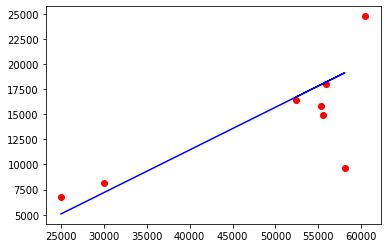

In [56]:
plt.scatter(X,y,color="red")
plt.plot(X_test, predictions, color="blue")